## Pair Programming Regresión Logística Decision Tree


In [100]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Decision Tree en este tipo de problemas. 

Los objetivos de este pair programming :
* Ajustad un modelo de Decision Tree a nuestros datos.
* Calculad las métricas a nuestro nuevo modelo.
* Comparad las métricas con el modelo hecho hasta ahora. ¿Cuál es mejor?

In [101]:
# Cargamos nuestro dataframe
df = pd.read_pickle('../Datos/obesity_est_encoding.pkl')
df.head()

,index,gender,antecedentes_familiares,comida_calorica,snacks,smoke,mide_calorias,freq_alcohol,medio_transporte,nivel_obesidad,age,vegetales,num_comidas_dia,cantidad_agua_dia,freq_ejercicio,tiempo_digital,height,weight
0,0,0,1,0,2,0,0,3,3,1,-0.521741,2.0,3.0,2.0,0.0,1.0,-0.875589,-0.862558
1,1,0,1,0,2,1,1,2,3,1,-0.521741,3.0,3.0,3.0,3.0,0.0,-1.947599,-1.168077
2,2,1,1,0,2,0,0,1,3,1,-0.207057,2.0,3.0,2.0,2.0,1.0,1.054029,-0.366090
3,3,1,0,0,2,0,0,1,4,5,0.422312,3.0,3.0,2.0,2.0,0.0,1.054029,0.015808
4,4,1,0,0,2,0,0,2,3,6,-0.364399,2.0,1.0,2.0,0.0,0.0,0.839627,0.122740


In [102]:
# separamos los datos en X e y

X1 = df.drop(["nivel_obesidad", 'index'], axis = 1)
y1 = df["nivel_obesidad"]

In [103]:
# separamos en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [104]:
# creamos el objeto del modelo
arbol = DecisionTreeClassifier(random_state =0)

# ajustamos el modelo 
arbol.fit(x_train1, y_train1)

DecisionTreeClassifier(random_state=0)

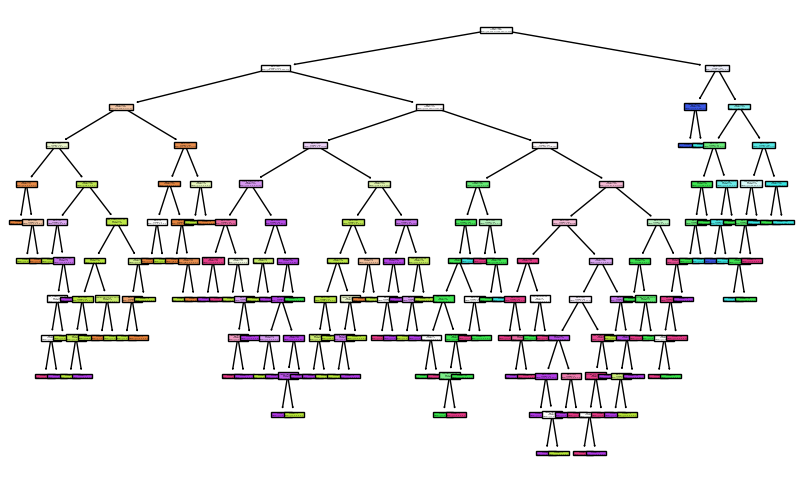

In [105]:
# Ploteamos nuestro decision tree completo
fig = plt.figure(figsize = (10,6))
tree.plot_tree(arbol, feature_names = x_train1.columns, filled = True)
plt.show();

In [106]:
# Nuestras max_features son 4

max_features = np.sqrt(len(x_train1.columns))
max_features

4.0

In [107]:
# Nuestro max_depth es de 11
print(arbol.tree_.max_depth)

11


In [108]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_esta = arbol.predict(x_test1)
y_pred_train_esta = arbol.predict(x_train1)

In [109]:
# Definimos una función para extraer las metricas en un dataframe
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test, average=None)
    recall_test = recall_score(clases_reales_test, clases_predichas_test, average=None)
    f1_test = f1_score(clases_reales_test, clases_predichas_test, average=None)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train, average=None)
    recall_train = recall_score(clases_reales_train, clases_predichas_train, average=None)
    f1_train = f1_score(clases_reales_train, clases_predichas_train, average=None)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df_ = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kappa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df_["modelo"] = modelo
    return df_

In [110]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results1 = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Decision Tree I")
dt_results1

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.940898,"[0.9016393442622951, 0.8709677419354839, 0.948...","[0.9821428571428571, 0.8709677419354839, 0.948...","[0.9401709401709402, 0.8709677419354839, 0.948...",0.930831,test,Decision Tree I
1,1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,train,Decision Tree I


Extraemos las métricas para cada una de nuestras categorías de la variable respuesta ya que al tener más de 1, nuestra función para extraer métricas nos generó un array con los resultados de todas, generando un nuevo dataframe para cada una de las categorías.

In [111]:

d ={'result_0':{}, 'result_1':{},'result_2':{},'result_3':{},'result_4':{},'result_5':{},'result_6':{}}

for i, key in enumerate(d):
    dicc ={'accuracy':[], 'precision':[], 'recall':[], 'f1':[], 'kappa':[], 'set':[], 'modelo':[]}

    for k, v in dicc.items():
        if type(dt_results1[k][0]) != np.ndarray:
            dicc[k].append(dt_results1[k][0])
            dicc[k].append(dt_results1[k][1])
        else:
            dicc[k].append(list(dt_results1[k][0])[i])
            dicc[k].append(list(dt_results1[k][1])[i])

    dicc['categoria']=[i,i]
    d[key] = pd.DataFrame(dicc)
    

In [112]:
# Mostramos las metricas en un dataframe para cada categoría

for k,v in d.items():
    print(f'Dataframe resultado para {k}:')
    display(d[k])

Dataframe resultado para result_0:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.940898,0.901639,0.982143,0.940171,0.930831,test,Decision Tree I,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree I,0


Dataframe resultado para result_1:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.940898,0.870968,0.870968,0.870968,0.930831,test,Decision Tree I,1
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree I,1


Dataframe resultado para result_2:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.940898,0.948718,0.948718,0.948718,0.930831,test,Decision Tree I,2
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree I,2


Dataframe resultado para result_3:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.940898,0.964912,0.948276,0.956522,0.930831,test,Decision Tree I,3
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree I,3


Dataframe resultado para result_4:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.940898,1.0,1.0,1.0,0.930831,test,Decision Tree I,4
1,1.000000,1.0,1.0,1.0,1.000000,train,Decision Tree I,4


Dataframe resultado para result_5:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.940898,0.925926,0.892857,0.909091,0.930831,test,Decision Tree I,5
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree I,5


Dataframe resultado para result_6:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.940898,0.979167,0.94,0.959184,0.930831,test,Decision Tree I,6
1,1.000000,1.000000,1.00,1.000000,1.000000,train,Decision Tree I,6


Unimos todos los datafames de resultados de categorías en solo 1 dataframe

In [113]:
resultados_totales= pd.DataFrame()
for k, dataf in d.items():
    resultados_totales = pd.concat([resultados_totales, dataf])

Visualizamos el dataframe con los resultados en train y test para cada una de las categorías con nuestro Decision Tree.

In [114]:
resultados_totales

,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.940898,0.901639,0.982143,0.940171,0.930831,test,Decision Tree I,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree I,0
0,0.940898,0.870968,0.870968,0.870968,0.930831,test,Decision Tree I,1
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree I,1
0,0.940898,0.948718,0.948718,0.948718,0.930831,test,Decision Tree I,2
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree I,2
0,0.940898,0.964912,0.948276,0.956522,0.930831,test,Decision Tree I,3
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree I,3
0,0.940898,1.000000,1.000000,1.000000,0.930831,test,Decision Tree I,4
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decision Tree I,4


Recordemos nuestras categorías de nuestra variable respuesta:


|  nivel_obesidad: 	|   	|   	|   	|   	|   	|   	|
|---	|---	|---	|---	|---	|---	|---	|
|  Insufficient_Weight = 0 	|  Normal_Weight = 1 	|  Obesity_Type_I = 2 	|  Obesity_Type_II = 3 	|  Obesity_Type_III = 4 	| Overweight_Level_I = 5  	|   Overweight_Level_II = 6	|

> Aunque nuestras métricas parecen realmente buenas, vamos a probar con el GridSearchCV para contrastar resultados

In [115]:
# Definimos los hiperparámetros que queremos probar y los valores que queremos

param = {"max_depth": [2,4,6,10,12,14],
        "max_features": [1,2,3,4,5],
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

Iniciamos el modelo con GridSearch

In [116]:
gs = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42),
            param_grid= param, 
            cv=10,
            verbose=-1)

Ajustamos el modelo que acabamos de definir en GridSearch

In [117]:
gs.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10, 12, 14],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

Generamos con best estimator, el mejor modelo según los hiperparámetros que indicamos anteriormente

In [118]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeClassifier(max_depth=10, max_features=5, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

Nuestro mejor modelo tendría un max_depth=10, max_features=5, min_samples_leaf=10, min_samples_split=10, random_state=42.

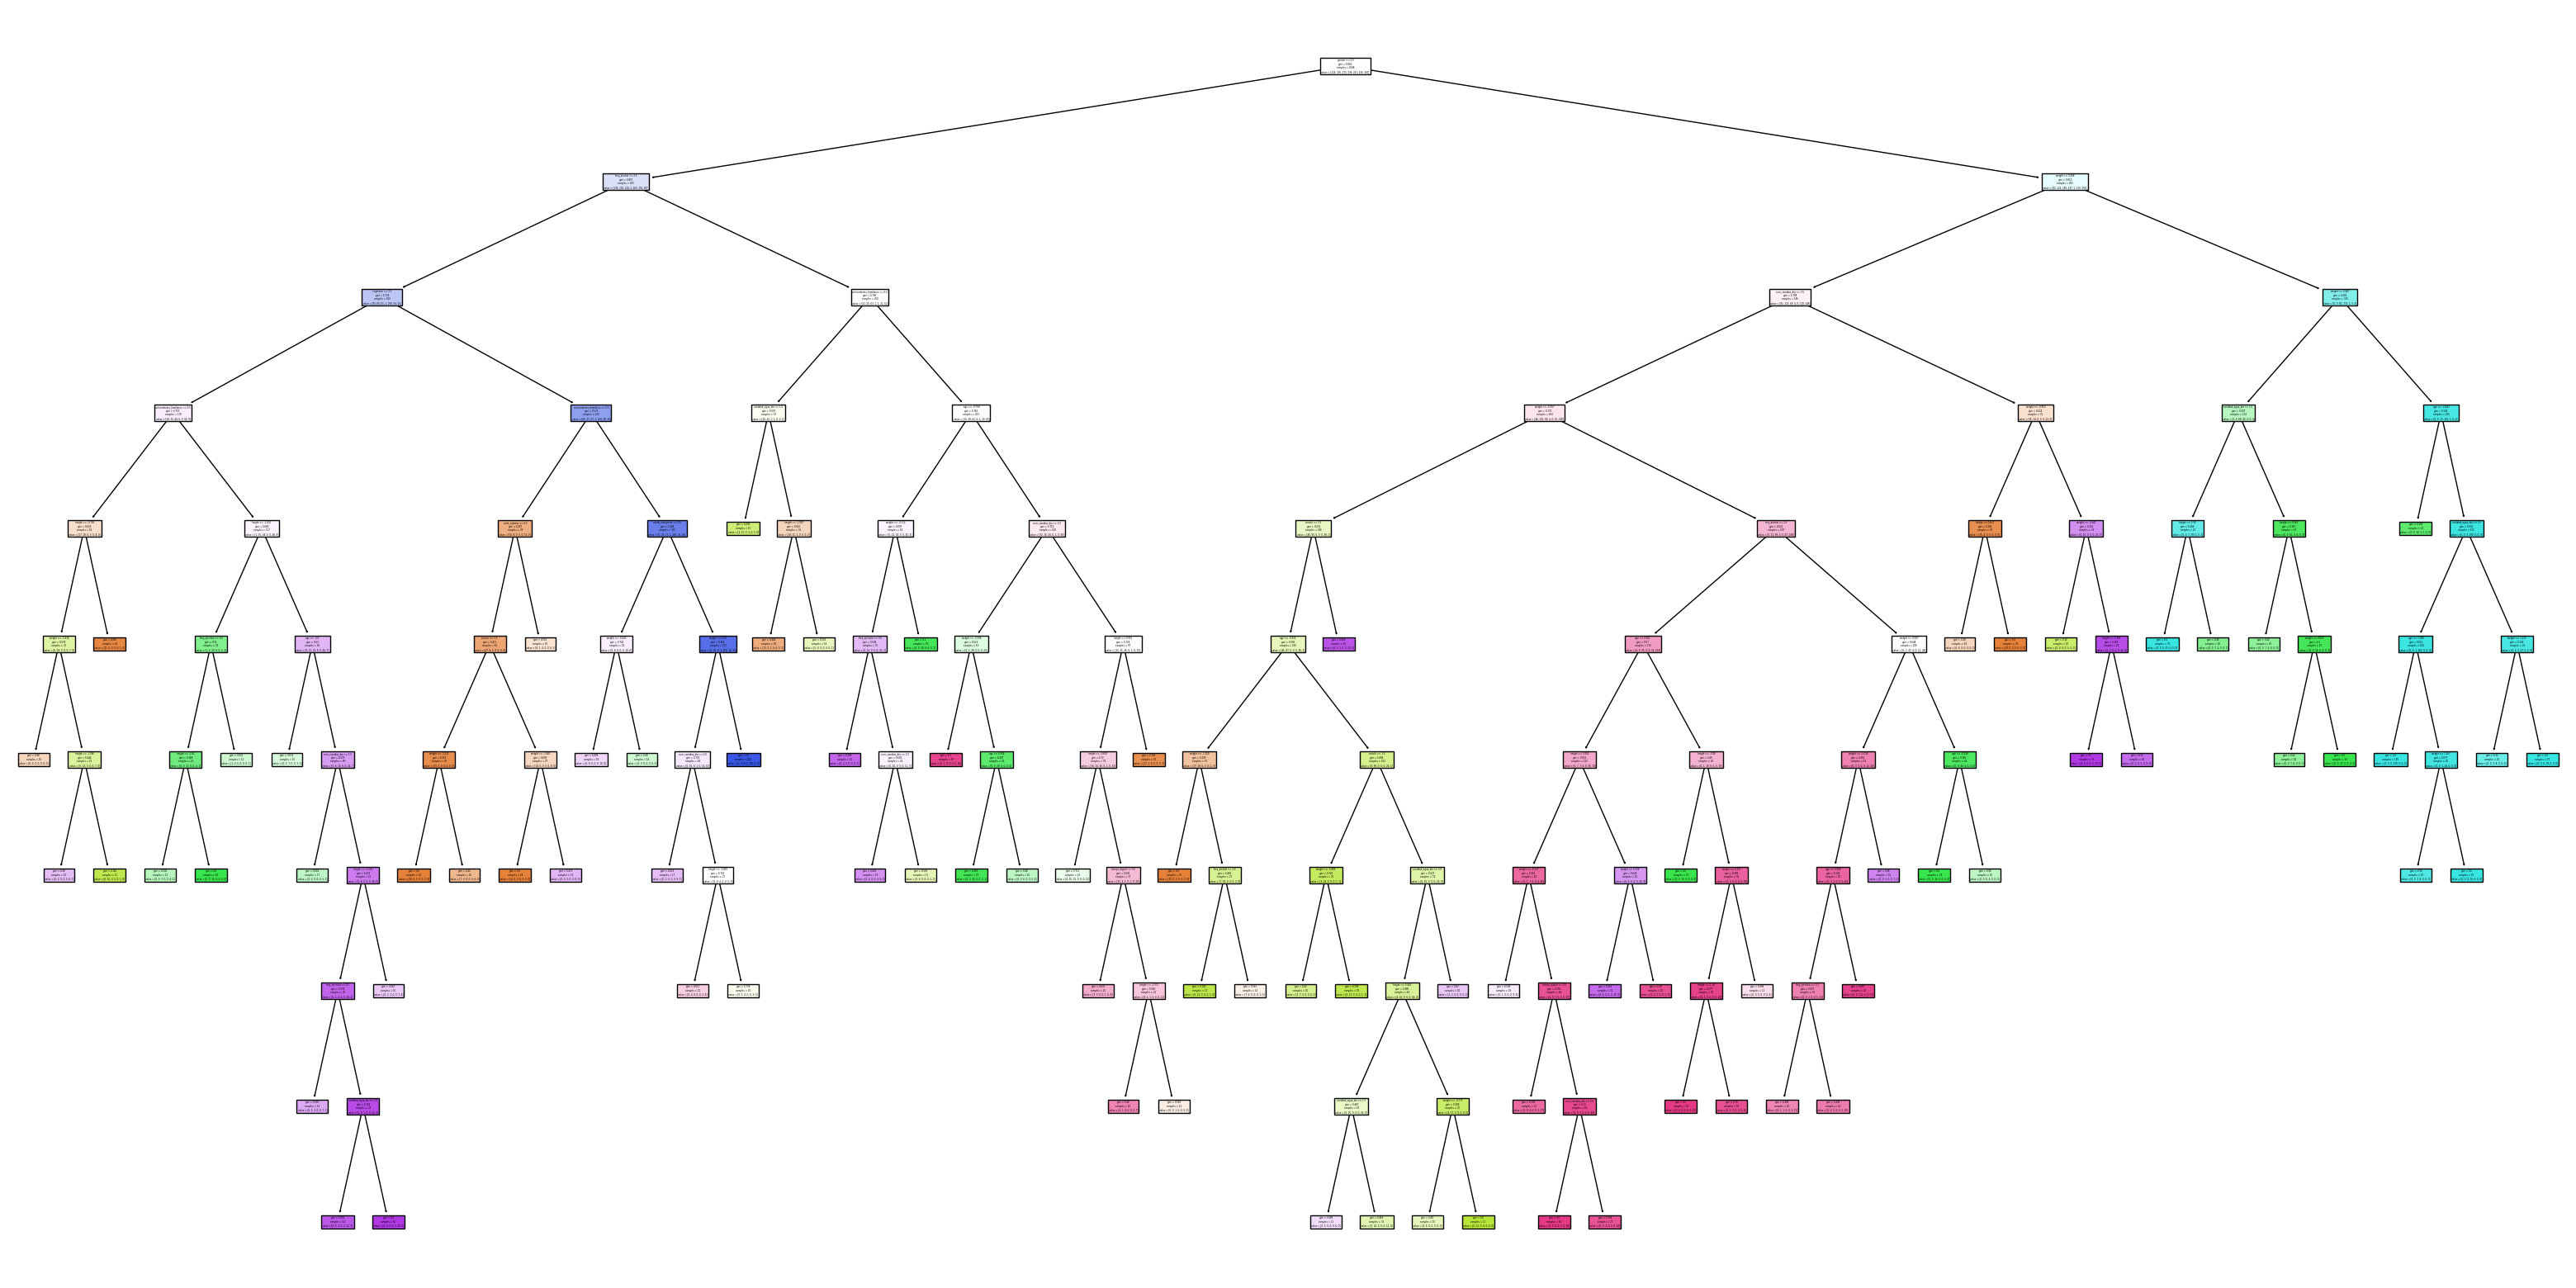

In [119]:
# Ploteamos el mejor modelo

fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train1.columns, filled=True);

In [120]:
# Hacemos las nuevas predicciones
y_pred_test_esta2 = mejor_modelo.predict(x_test1)
y_pred_train_esta2 = mejor_modelo.predict(x_train1)

Generamos un nuevo dataframe con el nuevo modelo ('el mejor modelo') para poder compararlo con las métricas del primer modelo.
Lo llamaremos 'Decision Tree II'

In [121]:
dt_results2 = metricas(y_test1, y_pred_test_esta2, y_train1,  y_pred_train_esta2, "Decision Tree II")
dt_results2

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.794326,"[0.8103448275862069, 0.6595744680851063, 0.779...","[0.8392857142857143, 0.5, 0.8589743589743589, ...","[0.8245614035087718, 0.5688073394495413, 0.817...",0.759118,test,Decision Tree II
1,0.827014,"[0.8296943231441049, 0.7076023391812866, 0.749...","[0.8796296296296297, 0.5377777777777778, 0.875...","[0.853932584269663, 0.6111111111111112, 0.8074...",0.797838,train,Decision Tree II


In [122]:
# Al igual que con Decision Tree I, extraeremos cada uno de los valores para cada categoría en un dataframe:

d2 ={'result_0':{}, 'result_1':{},'result_2':{},'result_3':{},'result_4':{},'result_5':{},'result_6':{}}

for i, key in enumerate(d2):
    dicc2 ={'accuracy':[], 'precision':[], 'recall':[], 'f1':[], 'kappa':[], 'set':[], 'modelo':[]}

    for k, v in dicc2.items():
        if type(dt_results2[k][0]) != np.ndarray:
            dicc2[k].append(dt_results2[k][0])
            dicc2[k].append(dt_results2[k][1])
        else:
            dicc2[k].append(list(dt_results2[k][0])[i])
            dicc2[k].append(list(dt_results2[k][1])[i])

    dicc2['categoria']=[i,i]
    d2[key] = pd.DataFrame(dicc2)

In [123]:
# Mostramos las metricas en un dataframe para cada categoría
for k,v in d2.items():
    print(f'Dataframe resultado para {k}:')
    display(d2[k])

Dataframe resultado para result_0:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.794326,0.810345,0.839286,0.824561,0.759118,test,Decision Tree II,0
1,0.827014,0.829694,0.879630,0.853933,0.797838,train,Decision Tree II,0


Dataframe resultado para result_1:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.794326,0.659574,0.500000,0.568807,0.759118,test,Decision Tree II,1
1,0.827014,0.707602,0.537778,0.611111,0.797838,train,Decision Tree II,1


Dataframe resultado para result_2:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.794326,0.779070,0.858974,0.817073,0.759118,test,Decision Tree II,2
1,0.827014,0.749216,0.875458,0.807432,0.797838,train,Decision Tree II,2


Dataframe resultado para result_3:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.794326,0.947368,0.931034,0.939130,0.759118,test,Decision Tree II,3
1,0.827014,0.986957,0.949791,0.968017,0.797838,train,Decision Tree II,3


Dataframe resultado para result_4:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.794326,1.0,1.000000,1.000000,0.759118,test,Decision Tree II,4
1,0.827014,1.0,0.992337,0.996154,0.797838,train,Decision Tree II,4


Dataframe resultado para result_5:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.794326,0.602941,0.732143,0.661290,0.759118,test,Decision Tree II,5
1,0.827014,0.698473,0.782051,0.737903,0.797838,train,Decision Tree II,5


Dataframe resultado para result_6:


,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.794326,0.750000,0.6600,0.702128,0.759118,test,Decision Tree II,6
1,0.827014,0.811927,0.7375,0.772926,0.797838,train,Decision Tree II,6


Unimos todas las métricas de cada categoría en 1 solo dataframe que llamaremos resultados_totales2

In [124]:
resultados_totales2= pd.DataFrame()
for k, dataf in d2.items():
    resultados_totales2 = pd.concat([resultados_totales2, dataf])

In [125]:
resultados_totales2

,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.794326,0.810345,0.839286,0.824561,0.759118,test,Decision Tree II,0
1,0.827014,0.829694,0.879630,0.853933,0.797838,train,Decision Tree II,0
0,0.794326,0.659574,0.500000,0.568807,0.759118,test,Decision Tree II,1
1,0.827014,0.707602,0.537778,0.611111,0.797838,train,Decision Tree II,1
0,0.794326,0.779070,0.858974,0.817073,0.759118,test,Decision Tree II,2
1,0.827014,0.749216,0.875458,0.807432,0.797838,train,Decision Tree II,2
0,0.794326,0.947368,0.931034,0.939130,0.759118,test,Decision Tree II,3
1,0.827014,0.986957,0.949791,0.968017,0.797838,train,Decision Tree II,3
0,0.794326,1.000000,1.000000,1.000000,0.759118,test,Decision Tree II,4
1,0.827014,1.000000,0.992337,0.996154,0.797838,train,Decision Tree II,4


 No vamos a unir los resultados del primer Decision Tree porque tienen overfitting, asique vamos a compararlos con los resultados de la regresion logistica

In [126]:
# Cargamos los resultados de la regresión logística
resultados_reg_log = pd.read_csv('../Datos/resultados_reg_log.csv', index_col=0)
resultados_reg_log

,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.749409,0.818182,0.964286,0.885246,0.707682,test,Regresion logistica,0
1,0.791469,0.838298,0.912037,0.873614,0.756681,train,Regresion logistica,0
0,0.749409,0.660714,0.596774,0.627119,0.707682,test,Regresion logistica,1
1,0.791469,0.678862,0.742222,0.709130,0.756681,train,Regresion logistica,1
0,0.749409,0.854545,0.602564,0.706767,0.707682,test,Regresion logistica,2
1,0.791469,0.843478,0.710623,0.771372,0.756681,train,Regresion logistica,2
0,0.749409,0.782609,0.931034,0.850394,0.707682,test,Regresion logistica,3
1,0.791469,0.849057,0.941423,0.892857,0.756681,train,Regresion logistica,3
0,0.749409,0.940299,1.000000,0.969231,0.707682,test,Regresion logistica,4
1,0.791469,0.962264,0.977011,0.969582,0.756681,train,Regresion logistica,4


Unimos el dataframe que contiene las métricas de Regresión Logística y nuestro mejor modelo, el Decision Tree II

In [127]:
resultados_dt_lr = pd.concat([resultados_totales2, resultados_reg_log])
resultados_dt_lr.reset_index(inplace=True) #realizamos un reset index ya que el hecho de tener 0 y 1 no nos permite utilizar la interpretación visual


In [128]:
resultados_dt_lr.drop(['index'], axis=1, inplace= True) #eliminamos el index para poder visualizar solo las columnas que nos interesan

In [129]:
# Vamos a añadir color para mejorar la interpretación visual
resultados_dt_lr.style.background_gradient(cmap='seismic')

,accuracy,precision,recall,f1,kappa,set,modelo,categoria
0,0.794326,0.810345,0.839286,0.824561,0.759118,test,Decision Tree II,0
1,0.827014,0.829694,0.879630,0.853933,0.797838,train,Decision Tree II,0
2,0.794326,0.659574,0.500000,0.568807,0.759118,test,Decision Tree II,1
3,0.827014,0.707602,0.537778,0.611111,0.797838,train,Decision Tree II,1
4,0.794326,0.779070,0.858974,0.817073,0.759118,test,Decision Tree II,2
5,0.827014,0.749216,0.875458,0.807432,0.797838,train,Decision Tree II,2
6,0.794326,0.947368,0.931034,0.939130,0.759118,test,Decision Tree II,3
7,0.827014,0.986957,0.949791,0.968017,0.797838,train,Decision Tree II,3
8,0.794326,1.000000,1.000000,1.000000,0.759118,test,Decision Tree II,4
9,0.827014,1.000000,0.992337,0.996154,0.797838,train,Decision Tree II,4


Recordemos nuestras categorías de nuestra variable respuesta:


|  nivel_obesidad: 	|   	|   	|   	|   	|   	|   	|
|---	|---	|---	|---	|---	|---	|---	|
|  Insufficient_Weight = 0 	|  Normal_Weight = 1 	|  Obesity_Type_I = 2 	|  Obesity_Type_II = 3 	|  Obesity_Type_III = 4 	| Overweight_Level_I = 5  	|   Overweight_Level_II = 6	|

> En nuestro caso estamos interesadas en que nuestro modelo nos devuelva el menor numero de falsos negativos posible, ya que por la salud de las personas estudiadas será mejor tenerles en cuenta como positivos para aplicarles tratamiento o recomendarles cambios en sus hábitos.
>
> Por lo tanto buscaremos obtener recalls lo más altos posibles y no nos importará tener accuracies ligeramente más bajos.
>
> Por las métricas interpretamos que nuestro modelo (Decision Tree II) es mejor prediciendo:
> * Obesidad de tipo III (cat-4): con un recall en test de 1.000000 y train 0.992337
> * Obesidad de tipo II (cat-3): con un recall en test de 0.931034 y train 0.949791
> * Obesidad de tipo I (cat-2): con un recall en test de 0.858974 y train 0.875458
> * Peso insuficiente (cat-0): con un recall en test de 0.839286 y train 0.879630
>
> Es el caso de que son las categorías que más nos interesan predecir por tratarse de los desequilibrios más importantes a tener en cuenta para un tratamiento.

In [130]:
# ademas vamos a guardar este dataframe en un csv para poder conservar las métricas de ambos modelos

resultados_dt_lr.to_pickle("../Datos/resultados_obesity_LR_DT.pkl")

In [131]:
# vamos a crearnos un dataframe para mostrar la importancia de las variables predictoras dentro de nuestro modelo
importancia_predictores_esta = pd.DataFrame(
                            {'predictor': x_train1.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores_esta.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_esta

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
15,weight,0.442533
1,antecedentes_familiares,0.096099
14,height,0.088986
0,gender,0.072838
9,vegetales,0.058502
8,age,0.058001
6,freq_alcohol,0.055964
11,cantidad_agua_dia,0.036945
10,num_comidas_dia,0.035440
7,medio_transporte,0.025156


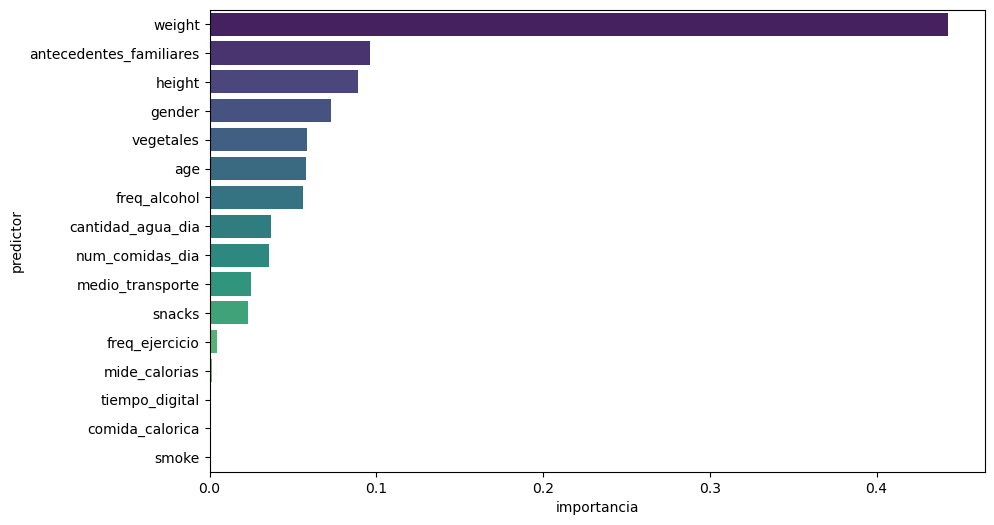

In [132]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores_esta, palette="viridis");
plt.show()

Conclusión:
* Podemos observar que la variable predictora con mayor importancia es el peso, lo cual es bastante lógico para poder determinar si una persona sufre de sobrepeso por lo que podríamos concluír que nuestro modelo está detectando correctamente éste parámetro.
* En segundo lugar tenemos los antecedentes familiares, es decir influye mucho para predecir nuestra variable respuesta el hecho de tener antecedentes familiares con obesidad.
* Muy a la par tenemos la altura, el género y el hecho de comer vegetales o no dentro de las comidas, la edad, la frecuencia en la que se ingiere alcohol.